In [ ]:
from urllib.request import urlopen 
import time 
import numpy as np
import json
import pywikibot
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
with open('graph.json') as graph:
  graph = json.loads(graph.read())

In [21]:
def estimate_url_latency(url):
    website = urlopen(url) 
    open_time = time.time()  
    output = website.read() 
    close_time = time.time() 
    website.close() 
    return (close_time - open_time) * 1000

In [106]:
NUM_URLS = 20

times_per_title = {}
for i in range(NUM_URLS):
    time_values = []
    title = list(graph.keys())[i]
    site = pywikibot.Site('en', 'wikipedia')
    
    # Récupérer la page de l'article
    page = pywikibot.Page(site, title)
    url = page.full_url()
    print(url)
    times = []
    for _ in range(50):
        t = estimate_url_latency(url)
        times.append(t)
    times_per_title[title] = times

https://en.wikipedia.org/wiki/Thompson_sampling
https://en.wikipedia.org/wiki/Biometrika
https://en.wikipedia.org/wiki/Causality
https://en.wikipedia.org/wiki/Exploration-exploitation_dilemma
https://en.wikipedia.org/wiki/Heuristic
https://en.wikipedia.org/wiki/Ian_Clarke_%28computer_scientist%29
https://en.wikipedia.org/wiki/Indicator_function
https://en.wikipedia.org/wiki/Markov_decision_process
https://en.wikipedia.org/wiki/Mathematics_of_Operations_Research
https://en.wikipedia.org/wiki/Multi-armed_bandit
https://en.wikipedia.org/wiki/Probability_matching
https://en.wikipedia.org/wiki/William_R._Thompson
https://en.wikipedia.org/wiki/Academic_publishing
https://en.wikipedia.org/wiki/Animal
https://en.wikipedia.org/wiki/Annals_of_Statistics
https://en.wikipedia.org/wiki/Annals_of_the_Institute_of_Statistical_Mathematics
https://en.wikipedia.org/wiki/Anthony_C._Davison
https://en.wikipedia.org/wiki/BIOSIS_Previews
https://en.wikipedia.org/wiki/Biological_Abstracts
https://en.wikipedi

In [107]:
np.array(list(times_per_title.values())).shape

(20, 50)

In [149]:
x = np.array(list(times_per_title.values())).flatten()
y = np.repeat(list(graph.keys())[:NUM_URLS], 50)

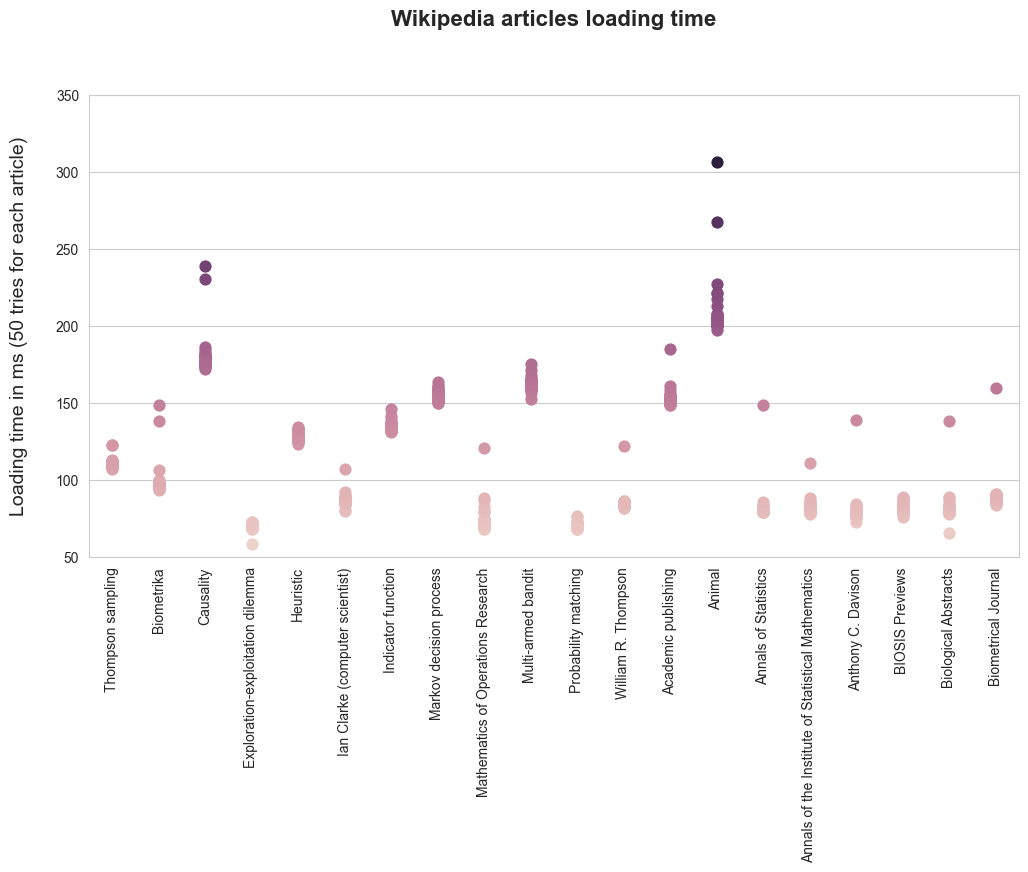

In [158]:
PLOT_PATH = './fig.png'

plt.figure(figsize=(12, 6))
fig = sns.pointplot(
    x=y,
    y=x,
    hue=x,
    markers='o',
    linestyle="none", 
    legend=False
)

fig.set_ylim([50, 350])
plt.xticks(rotation=90)
plt.ylabel('Loading time in ms (50 tries for each article)', fontsize=14, labelpad=20)
plt.title("Wikipedia articles loading time", fontsize=16, weight='bold', pad=50)

plt.savefig(PLOT_PATH, dpi=500, bbox_inches = "tight")

plt.show()
